In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append('../py')
from knn_classifier import KnnClassifier

# Include path to binaries on PATH variable
bin_path = os.path.join(os.path.dirname('../'))
os.environ['PATH'] = "{}:{}".format(bin_path, os.environ['PATH'])

def load_data(path):
    data = pd.read_csv(path, delimiter=",")
    Xy = data.as_matrix()
    return Xy[:,1:], Xy[:,0]

In [2]:
import itertools

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          only_errors=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    if only_errors:
        for i in range(cm.shape[0]):
            cm[i,i] = 0
        print('Cleared diagonal entries')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if only_errors and i == j:
            plt.text(j, i, '-')
        else:
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor real')
    plt.xlabel('Valor predicho')

In [4]:
X, y = load_data('../data/train.csv')
X.shape, y.shape

((42000, 784), (42000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

clf = KnnClassifier(k=3, alpha=37)
%time y_pred = clf.fit(X_train, y_train).predict(X_test)

Método: k-NN + PCA
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmplu1nw2u4... listo.
Tamaño dataset: 31500
Corriendo PCA... listo.
Autovalores: 334614 244481 212063 184707 167501 146908 112496 99526.2 94853.4 80457.3 72212.8 70997.8 58491.9 59015 54607.2 50772.5 45395 44064.3 40748.3 39535.9 36771.8 34756.3 32956.1 31463.4 30571 28660.7 27786.5 26724.4 25470.7 23592.4 22796.5 21881.6 20642.2 20278.5 19376.2 18423.4 17564 
Transformando dataset... listo.

CPU times: user 4.33 s, sys: 120 ms, total: 4.45 s
Wall time: 1min 29s


Confusion matrix, without normalization
[[1002    0    3    1    1    1    4    0    1    2]
 [   0 1178    6    0    0    0    2    1    2    1]
 [   6    1 1049    4    0    1    2    9    5    0]
 [   0    1    5 1029    0   12    1    5   10    7]
 [   1    4    0    0  995    0    6    1    0   27]
 [   1    0    1    6    1  904   11    1    3    2]
 [   0    0    0    0    1    4 1039    0    0    0]
 [   1    9    5    1    4    0    0 1096    0   13]
 [   2    5    1   11    2    7    5    0  957    5]
 [   3    1    1    3   15    5    2   16    1  969]]


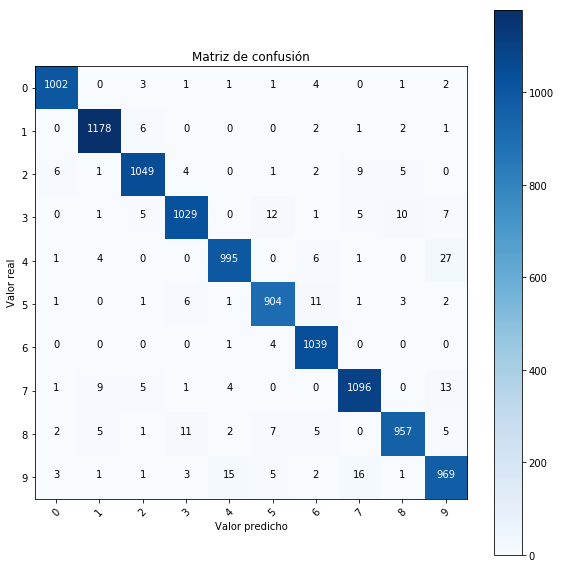

In [6]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=range(10), only_errors=False,
                      title='Matriz de confusión')

Confusion matrix, without normalization
Cleared diagonal entries
[[ 0  0  3  1  1  1  4  0  1  2]
 [ 0  0  6  0  0  0  2  1  2  1]
 [ 6  1  0  4  0  1  2  9  5  0]
 [ 0  1  5  0  0 12  1  5 10  7]
 [ 1  4  0  0  0  0  6  1  0 27]
 [ 1  0  1  6  1  0 11  1  3  2]
 [ 0  0  0  0  1  4  0  0  0  0]
 [ 1  9  5  1  4  0  0  0  0 13]
 [ 2  5  1 11  2  7  5  0  0  5]
 [ 3  1  1  3 15  5  2 16  1  0]]


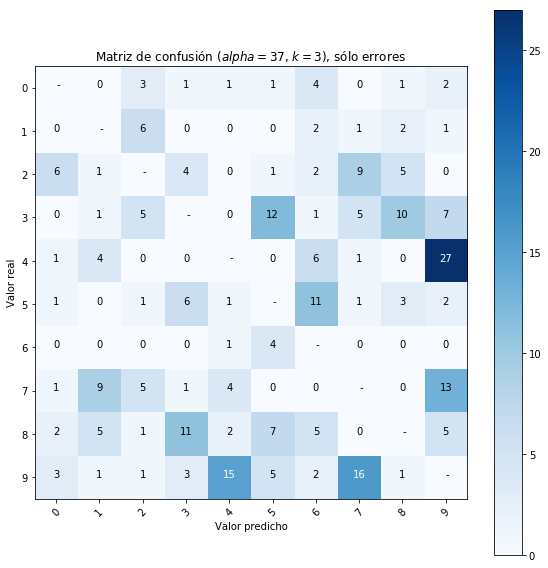

In [14]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=range(10), only_errors=True,
                      title='Matriz de confusión ($alpha=37$, $k=3$), sólo errores')

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=0)

clf2 = KnnClassifier(k=3, alpha=999, with_pca=False)
%time y_pred2 = clf2.fit(X_train2, y_train2).predict(X_test2)

Método: k-NN
Parámetro K = 3
Parámetro ALPHA = 999
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp6bmfmc6f... listo.
Tamaño dataset: 31500

CPU times: user 4.29 s, sys: 328 ms, total: 4.62 s
Wall time: 4min 55s


In [9]:
cnf_matrix2 = confusion_matrix(y_test2, y_pred2)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
Cleared diagonal entries
[[ 0  0  2  1  1  2  5  0  1  1]
 [ 0  0  4  1  0  0  1  1  1  0]
 [10  8  0  2  2  0  3 15  2  0]
 [ 1  0  4  0  0 10  1  6  5  6]
 [ 1  9  0  0  0  0  5  0  0 29]
 [ 1  0  0 10  0  0 12  0  0  3]
 [ 1  1  0  0  2  3  0  0  0  0]
 [ 1 11  5  1  2  0  0  0  0  9]
 [ 2  8  1 19  2 18  7  1  0  8]
 [ 3  2  1  3 12  3  1 24  0  0]]


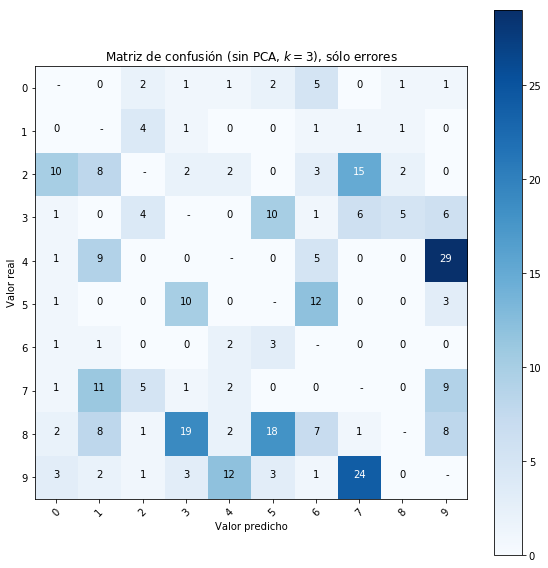

In [15]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix2, classes=range(10), only_errors=True,
                      title='Matriz de confusión (sin PCA, $k=3$), sólo errores')